<p align="center">
    <img src="https://github.com/GeostatsGuy/GeostatsPy/blob/master/TCG_color_logo.png?raw=true" width="220" height="240" />

</p>

## Subsurface Machine Learning with Ensemble Tree Regressor Methods

### Tree Bagging and Random Forest for Subsurface Modeling in Python

#### Harry Khuc, Senior Undergraduate, The University of Texas at Austin

#### Michael Pyrcz, Associate Professor, University of Texas at Austin 

##### [Twitter](https://twitter.com/geostatsguy) | [GitHub](https://github.com/GeostatsGuy) | [Website](http://michaelpyrcz.com) | [GoogleScholar](https://scholar.google.com/citations?user=QVZ20eQAAAAJ&hl=en&oi=ao) | [Book](https://www.amazon.com/Geostatistical-Reservoir-Modeling-Michael-Pyrcz/dp/0199731446) | [YouTube](https://www.youtube.com/channel/UCLqEr-xV-ceHdXXXrTId5ig)  | [LinkedIn](https://www.linkedin.com/in/michael-pyrcz-61a648a1) | [GeostatsPy](https://github.com/GeostatsGuy/GeostatsPy)

### PGE 383 Exercise: Ensemble Tree Regressors for Subsurface Modeling in Python 

Here's a simple workflow, demonstration of tree bagging and random forest for subsurface modeling workflows. This should help you get started with building subsurface models that data analytics and machine learning. Here's some basic details about ensemble tree methods.  

#### Ensemble Tree Methods

Machine learning method for supervised learning for classification and regression analysis.  Here are some key aspects of random forest.

**Prediction**

* estimate a function $\hat{f}$ such that we predict a response feature $Y$ from a set of predictor features $X_1,\ldots,X_m$. 

* the prediction is of the form $\hat{Y} = \hat{f}(X_1,\ldots,X_m)$ 

**Supervised Learning**

* the response feature label, $Y$, is available over the training and testing data
    
**Based on an Ensemble of Decision Trees**    
    
These are the concepts related to decision tree.    
   
**Hiearchical, Binary Segmentation of the Feature Space**

The fundamental idea is to divide the predictor space, $𝑋_1,\ldots,X_m$, into $J$ mutually exclusive, exhaustive regions

* **mutually exclusive** – any combination of predictors only belongs to a single region, $R_j$

* **exhaustive** – all combinations of predictors belong a region, $R_j$, regions cover entire feature space (range of the variables being considered)

For every observation in a region, $R_j$, we use the same prediction, $\hat{Y}(R_j)$    

For example predict production, $\hat{Y}$, from porosity, ${X_1}$

* given the data within a mD feature space, $X_1,\ldots,X_m$, find that boundary maximizes the gap between the two categories

* new cases are classified based on where they fall relative to this boundary 
 
**Proceedure for Tree Construction**

The tree is constructed from the top down.  We begin with a single region that covers the entire feature space and then proceed with a sequence of splits.

* **Scan All Possible Splits** over all regions and over all features.

* **Greedy Optimization**  The method proceeds by finding the first segmentation (split) in any feature that minimizes the residual sum of squares of errors over all the training data $y_i$ over all of the regions $j = 1,\ldots,J$.

\begin{equation}
RSS = \sum^{J}_{j=1} \sum_{i \in R_j} (y_i - \hat{y}_{R_j})^2
\end{equation}

* **Stopping Criteria** is typically based on minimum number of training data in each region for a robust estimation and / or minimum reduction in RSS for the next split 

**Esemble Methods**

Model testing accuracy is reduced by model variance.  Model variance may be reduced through averaging multiple good estimates.

Recall that variance is reduced by averaging given independent, identically distributed sampling as predicted by standard error as:

\begin{equation}
\sigma_{\bar{x}}^2 = \frac{\sigma^2_s}{n}
\end{equation}

Therefore, we can reduce model variance through the utilization of an ensemble of models.

\begin{equation}
\hat{f}_{avg}(X_1,...,X_m) = \frac{1}{B} \sum_{b=1}^{B} \hat{f}^b(X_1,...,X_m)
\end{equation}

This method works well with trees and is applied with the **tree bagging** and **random forest** prediction methods.

* the trees are allowed to grow deep and complicated (are not pruned)

* each of the individual models, $\hat{f}_{avg}(X_1,...,X_m)$, are complicated resulting in low model bias, but high model variance

* the averaging over the ensemble of models will then mitigate this high model variance

Therefore, overfit is not an issue as it is for decision trees.   

**Tree Bagging**

To build the ensemble of models we need multiple training datasets.  This is typically not available.

* the solution is to **bootstrap** the entire dataset to build multiple bootstrap realizations of training data, $X_1^b,...,X_m^b$

* a deep decision tree is fit to each realization of the training data, $\hat{f}^b(X_1^b,...,X_m^b)$

* a prediction estimate is calculated by each tree in the ensemble $Y^b =\hat{f}^b(X_1^b,...,X_m^b)$

* for **regression** the ensemble prediction is the average of the prediction from each member of the ensemble, $Y = \frac{1}{B} \sum_{b=1}^{B} Y^b$

* for **classification** the ensemble prediction is the majority-rule of the ensemble classifications, $Y = argmax_k(Y^b_k)$

**Out-of-Bag**

With bootstrap resampling of the data, it can be shown that about 2/3 of the data will be included (in expectation) for each tree.  

* therefore are 1/3 of the data (in expectation) unused in predicting each tree, these are know as out-of-bag observations

* for every response feature observation, $y_{\alpha}$,  there will be $\frac{B}{3}$ out-of-bag predictions, $y^{*,b}_{\alpha}$

* we can average (for regression) these prediction to calculate a single out-of-bag prediction, $y^{*}_{\alpha} = \sum_{\alpha = 1}^{\frac{B}{3}} y^{*,b}_{\alpha}$

* we then calculate the out-of-bag mean square error (MSE)

\begin{equation}
MSE_{OOB} = \sum_{\alpha = 1}^{\frac{B}{3}} \left[ y^{*}_{\alpha} - y_{\alpha} \right]^2
\end{equation}

**Interpretability**

Compared to decision trees, the ensemble methods have reduced interpretability.  One tool to improve model interpretability is feature importance.

We calculate variable importance through calculating the average of:

* residual sum of square reduction for all splits involving each predictor feature for regression

* the decrease in the Gini index for all splits involving each predictor feature for classification

Both are standardized to sum to 1.0 over the features.

**Random Forest**

One issue with tree bagging is the trees in the ensemble may be highly correlated.

* this occurs when there is a dominant predictor feature as it will always be applied to the top split(s), the result is all the trees in the ensemble are very similar (i.e. correlated)

* with highly correlated trees, there is significantly less reduction in model variance with the ensemble

* with random forest, for each split only $\sqrt{m}$ (or some other reduced set) of predictor features are candidates (selected at random)

* this forces each tree in the ensemble to evolve in disimilar manner 

##### Applications to Subsurface Modeling

We will predict unconventional well production from a single petrophysical and geomechanical predictor feature

##### Why Cover Ensemble Methods with Decision Trees?

Here's some thoughts:

* build on from easy to understand decision trees
* demonstrate reduction in model variance through an ensemble approach
* random forest is quite powerful and is a top performing machine learning method in various types of problems 

#### Workflow Goals

Learn the basics of ensemble tree methods in python to segment facies given petrophysical properties. This includes:

* Loading and visualizing sample data
* Trying out bagging tree and random forest 
* Test and observe the model behavoir and prove concepts
* Develop understanding of ensemble tree decision behavior through interactive plotting
* Provide hands-on example of decision tree splitting with Python packages matplotlib and ipywidgets


#### Objective 

In the PGE 383: Stochastic Subsurface Modeling class I want to provide hands-on experience with building subsurface modeling workflows. Python provides an excellent vehicle to accomplish this. I have coded a package called GeostatsPy with GSLIB: Geostatistical Library (Deutsch and Journel, 1998) functionality that provides basic building blocks for building subsurface modeling workflows. 

The objective is to remove the hurdles of subsurface modeling workflow construction by providing building blocks and sufficient examples. This is not a coding class per se, but we need the ability to 'script' workflows working with numerical methods.    

#### Getting Started

Here's the steps to get setup in Python with the GeostatsPy package:

1. Install Anaconda 3 on your machine (https://www.anaconda.com/download/). 
2. From Anaconda Navigator (within Anaconda3 group), go to the environment tab, click on base (root) green arrow and open a terminal. 
3. In the terminal type: pip install geostatspy. 
4. Open Jupyter and in the top block get started by copy and pasting the code block below from this Jupyter Notebook to start using the geostatspy functionality. 

You will need to copy the data file to your working directory.  They are available here:

* Tabular data - unconv_MV.csv found [here](https://github.com/GeostatsGuy/GeoDataSets/blob/master/unconv_MV.csv).

There are exampled below with these functions. You can go here to see a list of the available functions, https://git.io/fh4eX, other example workflows and source code. 

#### Import Required Packages

We will also need some standard packages. These should have been installed with Anaconda 3.

#### Load the required libraries

The following code loads the required libraries.

In [1]:
import os                                                   # to set current working directory 
import math                                                 # basic calculations like square root
from sklearn import tree                                    # tree program from scikit learn (package for machine learning)
from sklearn.tree import _tree                              # for accessing tree information
from sklearn import metrics                                 # measures to check our models
from sklearn.tree import export_graphviz                    # graphical visualization of trees
from sklearn.preprocessing import StandardScaler            # standardize variables to mean of 0.0 and variance of 1.0

from sklearn.model_selection import cross_val_score         # cross validation methods
from sklearn.tree import DecisionTreeRegressor              # decision tree method
from sklearn import model_selection
from sklearn.ensemble import BaggingRegressor               # bagging tree method
from sklearn.ensemble import RandomForestRegressor          # random forest method

import pandas as pd                                         # DataFrames and plotting
import pandas.plotting as pd_plot
import numpy as np                                          # arrays and matrix math
import matplotlib.pyplot as plt                             # plotting
from subprocess import check_call
import geostatspy.GSLIB as GSLIB                            # geostatistics and spatial methods

#### Import Additional Required Packages

The following workflow has been made interactive through the use of ipywidgets.

Instructions for installation of this package can be found [here](https://ipywidgets.readthedocs.io/en/latest/user_install.html)

In [2]:
%matplotlib inline
from ipywidgets import interactive                        # widgets and interactivity
from ipywidgets import widgets                            # widgets and interactivity
import matplotlib.pyplot as plt                           # plotting
import numpy as np                                        # working with arrays
from scipy.stats import triang                            # parametric distributions
from scipy.stats import binom                             # parametric distributions
from scipy.stats import norm                              # parametric distributions

If you get a package import error, you may have to first install some of these packages. This can usually be accomplished by opening up a command window on Windows and then typing 'python -m pip install [package-name]'. More assistance is available with the respective package docs.  

#### Declare functions

Let's define a couple of functions to streamline plotting correlation matrices and visualization and test our regression models. 

In [3]:
def plot_corr(dataframe,size=10):                           # plots a graphical correlation matrix 
    corr = dataframe.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    im = ax.matshow(corr,vmin = -1.0, vmax = 1.0)
    plt.xticks(range(len(corr.columns)), corr.columns);
    plt.yticks(range(len(corr.columns)), corr.columns);
    plt.colorbar(im, orientation = 'vertical')
    plt.title('Correlation Matrix')
    
def visualize_model(model,xfeature,x_min,x_max,yfeature,y_min,y_max,response,z_min,z_max,title,):# plots the data points and the decision tree prediction 
    n_classes = 10
    cmap = plt.cm.RdYlBu
    plot_step = 0.02
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                     np.arange(y_min, y_max, plot_step))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=cmap,vmin=z_min, vmax=z_max, levels=np.linspace(z_min, z_max, 100))

    im = plt.scatter(xfeature,yfeature,s=None, c=response, marker=None, cmap=cmap, norm=None, vmin=z_min, vmax=z_max, alpha=0.8, linewidths=0.3, verts=None, edgecolors="black")
    plt.title(title)
    plt.xlabel(xfeature.name)
    plt.ylabel(yfeature.name)
    cbar = plt.colorbar(im, orientation = 'vertical')
    cbar.set_label(response.name, rotation=270, labelpad=20)
    return Z

def visualize_grid(Z,xfeature,x_min,x_max,yfeature,y_min,y_max,response,z_min,z_max,title,):# plots the data points and the decision tree prediction 
    n_classes = 10
    cmap = plt.cm.RdYlBu
    plot_step = 0.02
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                     np.arange(y_min, y_max, plot_step))
    cs = plt.contourf(xx, yy, Z, cmap=cmap,vmin=z_min, vmax=z_max, levels=np.linspace(z_min, z_max, 100))

    im = plt.scatter(xfeature,yfeature,s=None, c=response, marker=None, cmap=cmap, norm=None, vmin=z_min, vmax=z_max, alpha=0.8, linewidths=0.3, verts=None, edgecolors="black")
    plt.title(title)
    plt.xlabel(xfeature.name)
    plt.ylabel(yfeature.name)
    cbar = plt.colorbar(im, orientation = 'vertical')
    cbar.set_label(response.name, rotation=270, labelpad=20)
    
def check_model(model,xfeature,yfeature,response,title):    # plots the estimated vs. the actual  
    predict_train = model.predict(np.c_[xfeature,yfeature])
    plt.scatter(response,predict_train,s=None, c='red',marker=None, cmap=None, norm=None, vmin=None, vmax=None, alpha=0.2, linewidths=0.3, verts=None, edgecolors="black")
    plt.title(title); plt.xlabel('Actual Production (MCFPD)'); plt.ylabel('Estimated Production (MCFPD)')
    plt.xlim(0,7000); plt.ylim(0,7000)
    plt.arrow(0,0,7000,7000,width=0.02,color='black',head_length=0.0,head_width=0.0)
    MSE = metrics.mean_squared_error(response,predict_train)
    Var_Explained = metrics.explained_variance_score(response,predict_train)
    cor = math.sqrt(metrics.r2_score(response,predict_train))
    print('Mean Squared Error on Training = ', round(MSE,2),', Variance Explained =', round(Var_Explained,2),'Cor =', round(cor,2))

def feature_sample(array, xmin, ymin, xstep, ystep, df_x, df_y, name): # sampling predictions from a feature space grid 

    if array.ndim != 2:
        raise ValueError("Array must be 2D")

    if len(df_x) != len(df_y):
        raise ValueError("x and y feature arrays must have equal lengths")
        
    ny, nx = array.shape
    df = pd.DataFrame()
    v = []
    nsamp = len(df_x)
    for isamp in range(nsamp):
        x = df_x.iloc[isamp]
        y = df_y.iloc[isamp]
        iy = min(ny - int((y - ymin) / ystep) - 1, ny - 1)
        ix = min(int((x - xmin) / xstep), nx - 1)
        v.append(array[iy, ix])
    df[name] = v
    return df    
    
def check_grid(grid,xmin,xmax,ymin,ymax,xfeature,yfeature,response,title):    # plots the estimated vs. the actual  
    if grid.ndim != 2:
        raise ValueError("Prediction array must be 2D")
    ny, nx = grid.shape
    xstep = (xmax - xmin)/nx; ystep = (ymax-ymin)/ny 
    #predict_train = model.predict(np.c_[xfeature,yfeature])
    predict_train = feature_sample(grid, xmin, ymin, xstep, ystep, xfeature, yfeature, 'sample')
    plt.scatter(response,predict_train,s=None, c='red',marker=None, cmap=None, norm=None, vmin=None, vmax=None, alpha=0.2, linewidths=0.3, verts=None, edgecolors="black")
    plt.title(title); plt.xlabel('Actual Production (MCFPD)'); plt.ylabel('Estimated Production (MCFPD)')
    plt.xlim(0,7000); plt.ylim(0,7000)
    plt.arrow(0,0,7000,7000,width=0.02,color='black',head_length=0.0,head_width=0.0)
    MSE = metrics.mean_squared_error(response,predict_train)
    Var_Explained = metrics.explained_variance_score(response,predict_train)
    cor = math.sqrt(metrics.r2_score(response,predict_train))
    print('Mean Squared Error on Training = ', round(MSE,2),', Variance Explained =', round(Var_Explained,2),'Cor =', round(cor,2))


#### Set the working directory

I always like to do this so I don't lose files and to simplify subsequent read and writes (avoid including the full address each time).


In [4]:
os.chdir("c:/Users/Khuc/MACHINELEARNING/PROJECT/")                                       # set the working directory

You will have to update the part in quotes with your own working directory and the format is different on a Mac (e.g. "~/PGE").  

#### Read the data table

First copy the "unconv_MV.csv" comma delimited file from https://github.com/GeostatsGuy/GeoDataSets to your working directory, then run this command to read the file into a DataFrame object (part of Pandas package).  

In [5]:
my_data = pd.read_csv("unconv_MV.csv")                      # load the comma delimited data file

Let's visualize the first several rows of our data stored in a DataFrame so we can make sure we successfully loaded the data file.

In [6]:
my_data.head(n=13)                                          # preview the first 13 rows of the DataFrame

,WellIndex,Por,LogPerm,AI,Brittle,TOC,VR,Production
0,1,15.91,1.67,3.06,14.05,1.36,1.85,177.381958
1,2,15.34,1.65,2.60,31.88,1.37,1.79,1479.767778
2,3,20.45,2.02,3.13,63.67,1.79,2.53,4421.221583
3,4,11.95,1.14,3.90,58.81,0.40,2.03,1488.317629
4,5,19.53,1.83,2.57,43.75,1.40,2.11,5261.094919
5,6,19.47,2.04,2.73,54.37,1.42,2.12,5497.005506
6,7,12.70,1.30,3.70,43.03,0.45,1.95,1784.266285
7,8,14.15,1.23,2.53,39.43,0.79,1.54,1943.639213
8,9,16.18,1.34,3.45,45.79,0.56,1.95,3176.523611
9,10,20.51,2.48,2.78,28.99,1.78,2.24,2522.792318


Let's remove the well index and check the summary summary statistics.  We will also take the first 300 samples for training data and the remaining 700 data for testing data.

* we use only 300 data for testing to increase the difficulty for demonstration

* the samples are random order, so this is 100 random samples from the dataset

In [7]:
my_data_test = my_data.iloc[300:,1:8]                     # extract 700 samples for testing (we want more challenge so we reduce the training data set size)
my_data = my_data.iloc[0:300,1:8]                         # copy all rows and columns 1 through 8, note 0 column is removed
my_data.describe().transpose()                            # calculate summary statistics for the data

,count,mean,std,min,25%,50%,75%,max
Por,300.0,14.665567,3.067537,5.400000,12.567500,14.600000,16.705000,23.850000
LogPerm,300.0,1.383500,0.413808,0.240000,1.140000,1.365000,1.660000,2.570000
AI,300.0,3.008800,0.583795,1.210000,2.610000,3.000000,3.392500,4.700000
Brittle,300.0,50.542900,15.192652,-10.500000,39.972500,49.635000,59.472500,93.470000
TOC,300.0,0.963533,0.522031,-0.260000,0.630000,0.940000,1.295000,2.710000
VR,300.0,1.982000,0.318500,0.900000,1.807500,2.010000,2.170000,2.840000
Production,300.0,2163.794498,1385.996631,2.713535,1198.823083,1918.290331,2917.155099,8554.267033


In [8]:
my_data_test.describe().transpose()                         # summary statistics for the testing data     

,count,mean,std,min,25%,50%,75%,max
Por,700.0,15.072557,3.007191,5.790000,12.940000,15.195000,17.177500,24.65000
LogPerm,700.0,1.405471,0.402677,0.120000,1.130000,1.400000,1.690000,2.58000
AI,700.0,2.971386,0.575020,0.960000,2.557500,3.010000,3.340000,4.63000
Brittle,700.0,49.366586,15.024255,-1.500000,39.652500,49.720000,58.905000,89.85000
TOC,700.0,1.021071,0.496872,-0.200000,0.650000,1.030000,1.370000,2.56000
VR,700.0,1.995100,0.303818,0.930000,1.810000,1.980000,2.180000,2.90000
Production,700.0,2283.082085,1496.079421,9.854247,1180.670891,2009.467003,3077.488749,12568.64413


It is good that we checked the summary statistics, because we have some negative values for brittleness and total organic carbon. The is physically imposible.  The values must be in error. We know the lowest possible values are 0.0, so we will truncate on 0.0.  We use the *get_numerical_data()* DataFrame member function to get a shallow copy of the data from the DataFrame.  Since it is a shallow copy, any changes we make to the copy are made to the data in the original DataFrame.  This allows us to apply this simple conditional statement to all the data values in the DataFrame all at once.

In [9]:
num = my_data._get_numeric_data()                           # get the numerical values
num[num < 0] = 0                                            # truncate negative values to 0.0
my_data.describe().transpose()                              # calculate summary statistics for the data

,count,mean,std,min,25%,50%,75%,max
Por,300.0,14.665567,3.067537,5.400000,12.567500,14.600000,16.705000,23.850000
LogPerm,300.0,1.383500,0.413808,0.240000,1.140000,1.365000,1.660000,2.570000
AI,300.0,3.008800,0.583795,1.210000,2.610000,3.000000,3.392500,4.700000
Brittle,300.0,50.577900,15.063097,0.000000,39.972500,49.635000,59.472500,93.470000
TOC,300.0,0.968100,0.512586,0.000000,0.630000,0.940000,1.295000,2.710000
VR,300.0,1.982000,0.318500,0.900000,1.807500,2.010000,2.170000,2.840000
Production,300.0,2163.794498,1385.996631,2.713535,1198.823083,1918.290331,2917.155099,8554.267033


This dataset has variables from 1,000 unconventional wells including well average porosity, log transform of permeability (to linearize the relationships with other variables), accoustic impedance (kg/m2s*10^6), brittness ratio (%), total organic carbon (%), vitrinite reflectance (%), and initial production 90 day average (MCFPD).  Note, the dataset is synthetic.

#### Feature Ranges

Let's set predictor and response feature ranges for plotting.

In [10]:
pormin = 5.0; pormax = 25.0                                 # set minumums and maximums for visualization 
brittlemin = 0.0; brittlemax = 100.0
prodmin = 0.0; prodmax = 13000.0

#### Calculate the correlation matrix 

For multivariate analysis it is a good idea to check the correlation matrix.  We can calculate it and view it in the console with these commands.

In [11]:
corr_matrix = np.corrcoef(my_data, rowvar = False)
print(np.around(corr_matrix,2))                             # print the correlation matrix to 2 decimals

[[ 1.    0.81 -0.53 -0.23  0.73  0.07  0.7 ]
 [ 0.81  1.   -0.37 -0.11  0.53  0.01  0.56]
 [-0.53 -0.37  1.    0.21 -0.52  0.54 -0.33]
 [-0.23 -0.11  0.21  1.   -0.25  0.26 -0.17]
 [ 0.73  0.53 -0.52 -0.25  1.    0.31  0.57]
 [ 0.07  0.01  0.54  0.26  0.31  1.    0.17]
 [ 0.7   0.56 -0.33 -0.17  0.57  0.17  1.  ]]


Note the 1.0 diagonal resulting from the correlation of each variable with themselves.  

Let's use our function declared above to make a graphical correlation matrix visualization.  This may inprove our ability to spot features.  It relies on the built in correlation matrix method with Numpy DataFrames and MatPlotLib for plotting.

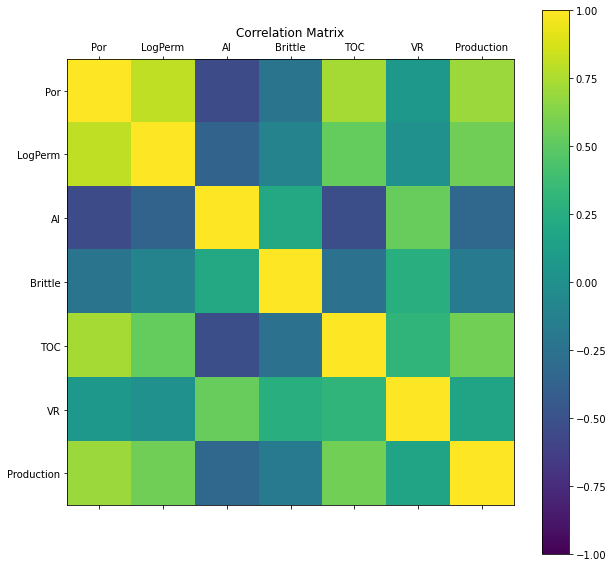

In [12]:
plot_corr(my_data,10)                                       # using our correlation matrix visualization function
plt.show()

This looks good.  There is a mix of correlation magnitudes. Of course, correlation coeffficients are limited to degree of linear correlations.  For more complete information, let's look at the matrix scatter plot from the Pandas package. 

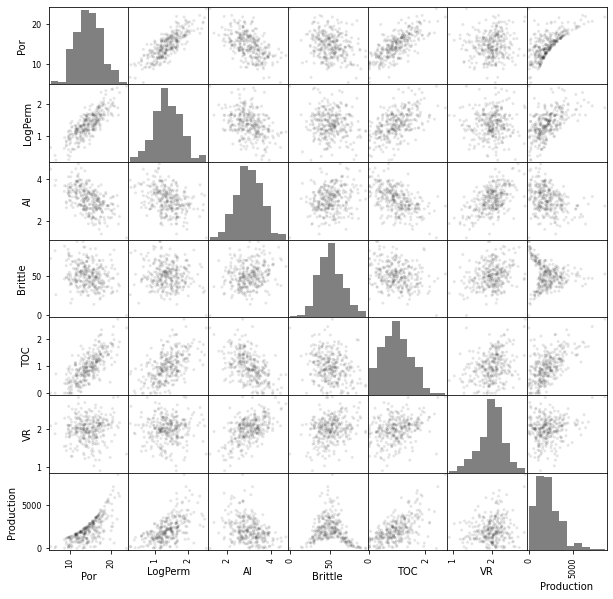

In [13]:
pd_plot.scatter_matrix(my_data, alpha = 0.1,                # pandas matrix scatter plot
    figsize=(10, 10),color = 'black', hist_kwds={'color':['grey']})
plt.show()

#### Working with Only Two Features

Let's simplify the problem to 2 feature), Porosity and Brittleness to predict Production rate.  We will also reduce the number of wells from 1,000 to 500.  By working with only 2 features, it is very easy to visualize the segmentation of the feature space (it is only 2D and can be shown compleltely on a single plot).

In [14]:
my_data_subset = my_data.iloc[:,[0,3,6]]                    # extract just por, brittle and prod with 300 training samples
my_data_test_subset = my_data_test.iloc[:,[0,3,6]]          # extract just por, brittle and prod with 700 testing samples
my_data_subset.describe().transpose()                       # calculate summary statistics for the data

,count,mean,std,min,25%,50%,75%,max
Por,300.0,14.665567,3.067537,5.400000,12.567500,14.600000,16.705000,23.850000
Brittle,300.0,50.577900,15.063097,0.000000,39.972500,49.635000,59.472500,93.470000
Production,300.0,2163.794498,1385.996631,2.713535,1198.823083,1918.290331,2917.155099,8554.267033


Let's first check the univariate statistics of Porosity, Brittleness and Producton.

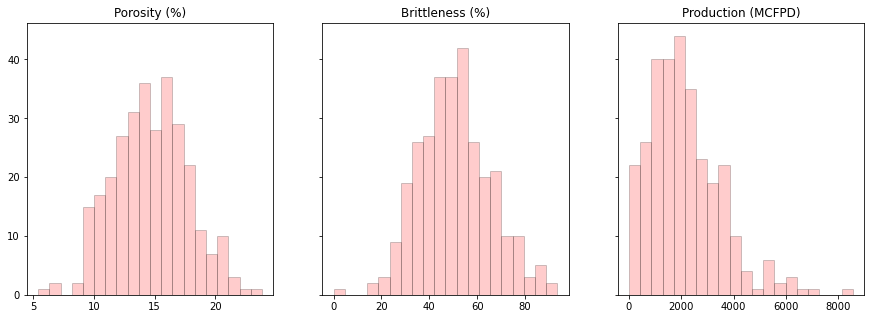

In [15]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True,figsize=(15,5)) # plot histograms
ax1.hist(my_data_subset["Por"], alpha = 0.2, color = 'red', edgecolor = 'black', bins=20)
ax1.set_title('Porosity (%)')
ax2.hist(my_data_subset["Brittle"], alpha = 0.2, color = 'red', edgecolor = 'black', bins=20)
ax2.set_title('Brittleness (%)')
ax3.hist(my_data_subset["Production"], alpha = 0.2, color = 'red', edgecolor = 'black', bins=20)
ax3.set_title('Production (MCFPD)')
prod_min = round(min(my_data_subset["Production"]),0); prod_max = round(max(my_data_subset["Production"]),0)
plt.show()

The distributions are well behaved, we cannot observe obvious gaps nor truncations.  Let's look at a scatter plot of Porosity vs. Brittleness with points colored by Production.

C:\Users\Khuc\anaconda3\lib\site-packages\ipykernel_launcher.py:2: MatplotlibDeprecationWarning: 
The 'verts' parameter of scatter() was deprecated in Matplotlib 3.2 and will be removed two minor releases later. If any parameter follows 'verts', they should be passed as keyword, not positionally.
  


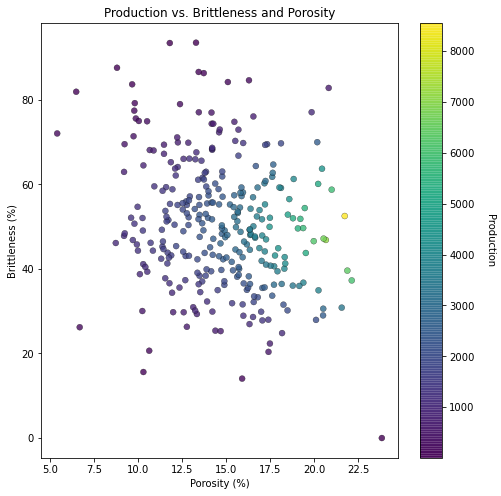

In [16]:
plt.figure(figsize=(8,8))                                   # plot the training data
im = plt.scatter(my_data_subset["Por"],my_data_subset["Brittle"],s=None, c=my_data_subset["Production"], marker=None, cmap=None, norm=None, vmin=None, vmax=None, alpha=0.8, linewidths=0.3, verts=None, edgecolors="black")
plt.title('Production vs. Brittleness and Porosity'); plt.xlabel('Porosity (%)'); plt.ylabel('Brittleness (%)')
cbar = plt.colorbar(im, orientation = 'vertical')
cbar.set_label("Production", rotation=270, labelpad=20)
plt.show()

This problem looks complicated and could not be modeled with simple linear regression.  It appears there is a sweet spot for Brittleness and increasing Porosity is always beneficial for Production.

#### Seperate Predictor and Response Feature DataFrames

The input for the decision tree is 2 DataFrames, one with the predictors / features and the other with the response variable.  We will use the DataFrame member function copy() to copy the respective columns to 2 new DataFrames.  

In [17]:
predictors = my_data_subset[['Por','Brittle']].copy()       # make a new DataFrame with predictor features for training
response = my_data_subset[['Production']].copy()            # make a new DataFrame with responses features for training
predictors_test = my_data_test_subset[['Por','Brittle']].copy() # make a new DataFrame with predictor features for testing
response_test = my_data_test_subset[['Production']].copy()  # make a new DataFrame with responses for testing

#### Ensemble Tree Method - Tree Bagging Regression

To perform tree bagging we will:

1. set the hyperparameters for the individual trees

```python
seed = 73073
max_depth = 100
min_samples_leaf = 2  
```

2. instantiate an individual regression tree

```python
regressor = DecisionTreeRegressor(max_depth = max_depth, min_samples_leaf = min_samples_leaf)
```

3. set the bagging hyperparameters

```python
num_trees = 100
seed = 73073
```

4. instantiate the bagging regressor with the previously instantiated regression tree (wrapping the decision tree)

```python
bagging_model = BaggingRegressor(base_estimator=regressor, n_estimators=num_trees, random_state=seed)
```

5. train the bagging regression (wrapping the decision tree)


```python
bagging_model.fit(X = predictors, y = response)
```

6. visualize the model result over the feature space (easy to do as we have only 2 predictor features)

#### Demonstration of Bagging by-Hand

For demonstration let's set the number of trees to 1 and run 6 bagging regressors.  

* the result for each is simply a complex decision tree

* note, the random_state parameter is the random number seed for the bootstrap in the bagging method

* the trees vary for each random number seed since the bootstrapped dataset will be different for each

We will loop over the models and store each of them in an list of models!

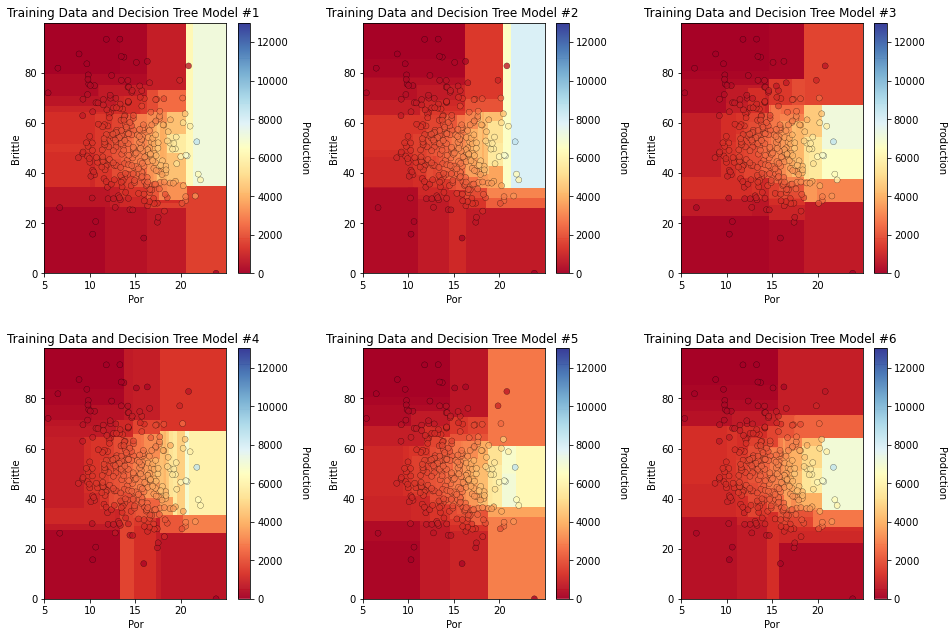

In [18]:
import warnings
warnings.filterwarnings('ignore')                           # suppress warnings

max_depth = 100; min_samples_leaf = 2                       # set for a complicated tree

regressor = DecisionTreeRegressor(max_depth = max_depth, min_samples_leaf = min_samples_leaf) # instantiate a decision tree

num_tree = 1                                                # use only a single tree for this demonstration
seeds = [73073, 73074, 73075, 73076, 73077, 73078]
bagging_models = []; oob_MSE = []; score = []; pred = []

index = 1
for seed in seeds:                                          # loop over random number seeds
    bagging_models.append(BaggingRegressor(base_estimator=regressor, n_estimators=num_tree, random_state=seed, oob_score = True, n_jobs = 4))
    bagging_models[index-1].fit(X = predictors, y = response)
    oob_MSE.append(bagging_models[index-1].oob_score_)
    score.append(bagging_models[index-1].score(X = predictors_test, y = response_test))
    plt.subplot(2,3,index)
    pred.append(visualize_model(bagging_models[index-1],my_data_subset["Por"],pormin,pormax,my_data_subset["Brittle"],brittlemin,brittlemax,my_data_subset["Production"],prodmin,prodmax,'Training Data and Decision Tree Model #' + str(index) + ' '))
    index = index + 1
    
plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=2.0, wspace=0.4, hspace=0.3)

Notice that there is significant misfit with the data 

* recall, in expectation, only 2/3 of the data are used for each tree

Let's check the cross validation results with the withheld testing data.

Mean Squared Error on Training =  233039.81 , Variance Explained = 0.9 Cor = 0.95
Mean Squared Error on Training =  180027.49 , Variance Explained = 0.92 Cor = 0.96
Mean Squared Error on Training =  183684.27 , Variance Explained = 0.92 Cor = 0.96
Mean Squared Error on Training =  260774.43 , Variance Explained = 0.88 Cor = 0.94
Mean Squared Error on Training =  274141.24 , Variance Explained = 0.88 Cor = 0.94
Mean Squared Error on Training =  167768.95 , Variance Explained = 0.93 Cor = 0.96


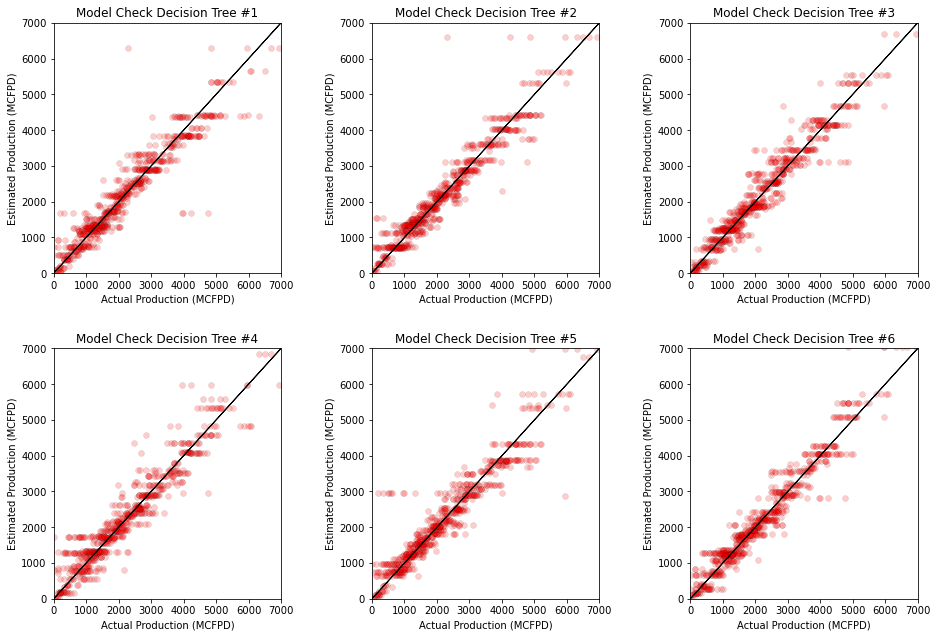

In [19]:
index = 1
for seed in seeds:                                          # loop over random number seeds
    plt.subplot(2,3,index)
    check_model(bagging_models[index-1],my_data_test_subset["Por"],my_data_test_subset["Brittle"],my_data_test_subset["Production"],'Model Check Decision Tree #' + str(index))
    index = index + 1
plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=2.0, wspace=0.4, hspace=0.3)

Now let's demonstrate the averaging of the predictions over the 6 decision trees.

* we average the predicted response feature (production) over the discretized predictor feature space

* we can take advantage of broadcast methods for operations on entire arrays

* we will apply the same model check, but we will use a modified function to will read in the response feature 2D array, instead of a model

Mean Squared Error on Training =  171927.36 , Variance Explained = 0.92 Cor = 0.96


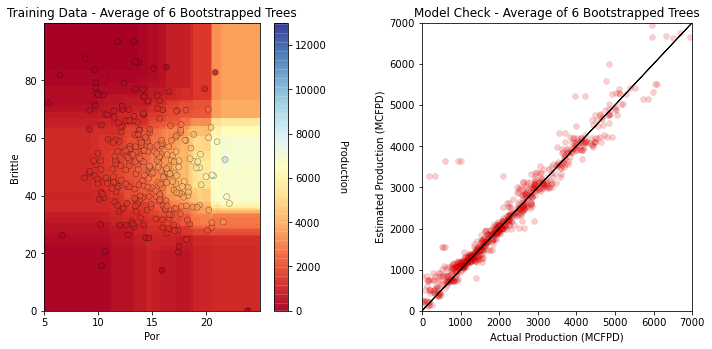

In [20]:
Z = pred[0] 
index = 1
for seed in seeds:                                          # loop over random number seeds
    if index == 1:
        Z = pred[index-1]
    else:
        Z = Z + pred[index-1]                               # calculate the average response over 3 trees
    index = index + 1

Z = Z / len(seeds)
    
plt.subplot(121)                                            # plot predictions over predictor feature space
visualize_grid(Z,my_data_subset["Por"],pormin,pormax,my_data_subset["Brittle"],brittlemin,brittlemax,my_data_subset["Production"],prodmin,prodmax,'Training Data - Average of 6 Bootstrapped Trees')

plt.subplot(122)                                            # check model predictions vs. testing dataset
check_grid(Z,pormin,pormax,brittlemin,brittlemax,my_data_test_subset["Por"],my_data_test_subset["Brittle"],my_data_test_subset["Production"],'Model Check - Average of 6 Bootstrapped Trees')

plt.subplots_adjust(left=0.0, bottom=0.0, right=1.5, top=1.0, wspace=0.4, hspace=0.2)

We made 6 complicated trees, each trained with bootstrap resamples of the original data and then averaged the predictions from each.

* the result is more smooth - lower model variance 

* the result more closely matches the training data

Note that the correlation and variance explained in cross validation is better than the average of the single tree models.

* also notice that the cross plot is starting to concentrate over the 45 degree line

* there are still some outliers, this would improved if we ran more trees, but this would be computationally inefficient by hand, let's use the built-in methods in scikit learn moving forward

#### Demonstration of Bagging with Increasing Number of Trees

For demonstration, let's build 6 bagging tree regression models with increasing number of overly complicated (and likely overfit) trees averaged.

* with the bagging regressor from scikit learn this is automated with the 'num_tree' hyperparameter

We will loop over the models and store each of them in an list of models again!

### Interactive Decision Tree Bagging Demonstration

* select the inputs and observe the outputs of the decision trees and their model variance
* interactive plot demonstration with ipywidgets, matplotlib packages

#### Harry Khuc, Senior Undergraduate, The University of Texas at Austin

##### [LinkedIn](https://www.linkedin.com/in/harry-khuc)

#### Michael Pyrcz, Associate Professor, University of Texas at Austin 

##### [Twitter](https://twitter.com/geostatsguy) | [GitHub](https://github.com/GeostatsGuy) | [Website](http://michaelpyrcz.com) | [GoogleScholar](https://scholar.google.com/citations?user=QVZ20eQAAAAJ&hl=en&oi=ao) | [Book](https://www.amazon.com/Geostatistical-Reservoir-Modeling-Michael-Pyrcz/dp/0199731446) | [YouTube](https://www.youtube.com/channel/UCLqEr-xV-ceHdXXXrTId5ig)  | [LinkedIn](https://www.linkedin.com/in/michael-pyrcz-61a648a1) | [GeostatsPy](https://github.com/GeostatsGuy/GeostatsPy)

### The Inputs

Select the inputs for each function:

* **Number of Trees**

In [35]:
#WORKFLOW
import warnings
warnings.filterwarnings('ignore')

max_depth = 3; min_samples_leaf = 5                         # set for a complicated tree

regressor = DecisionTreeRegressor(max_depth = max_depth, min_samples_leaf = min_samples_leaf) # instantiate a decision tree

seed = 73073;

def update(a):
    
    num_trees = [*range(1, int(a)+1, 1)] # controlling number of trees
    b = widgets.Tab(children = [out1, out2]) 
    
    with out1:
        #Original Code
        bagging_models_ntrees = []
        oob_MSE = []
        score = []

        index = 1
        print('Complete of ' + str(len(num_trees)) + ': ', end =" ")
        if(len(num_trees) == 0):
            print("No trees set yet")   
        else:
            for num_tree in num_trees:                                  # loop over number of trees
                bagging_models_ntrees.append(BaggingRegressor(base_estimator=regressor, n_estimators=num_tree, random_state=seed, oob_score = True, n_jobs = 4))
                bagging_models_ntrees[index-1].fit(X = predictors, y = response)
                oob_MSE.append(bagging_models_ntrees[index-1].oob_score_)
                score.append(bagging_models_ntrees[index-1].score(X = predictors_test, y = response_test))
                plt.subplot(3,3,index)
                visualize_model(bagging_models_ntrees[index-1],my_data_subset["Por"],pormin,pormax,my_data_subset["Brittle"],brittlemin,brittlemax,my_data_subset["Production"],prodmin,prodmax,'Training Data and Tree Model - ' + str(num_tree) + ' Tree(s)')
                print(str(index)+ ', ', end =" ")
                index = index + 1
        plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=2.0, wspace=0.2, hspace=0.3)
        plt.show()

    with out2:        
        index = 1
        print('Complete of ' + str(len(num_trees)) + ': ', end =" ")
        if(len(num_trees) == 0):
            print("No trees set yet")
        else:
            for num_tree in num_trees:                                  # loop over number of trees
                plt.subplot(3,3,index)
                check_model(bagging_models_ntrees[index-1],my_data_test_subset["Por"],my_data_test_subset["Brittle"],my_data_test_subset["Production"],'Model Check Bagging Tree, Number of Trees ' + str(num_trees[index-1]))
                index = index + 1
        plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=2.0, wspace=0.4, hspace=0.3)
        plt.show()

In [36]:
#INTERACTION
a = widgets.Dropdown(
    options=['0','1', '2', '3','4','5','6','7','8','9'],
    value='0',
    description='# of Trees:',
    disabled=False,
)

out1 = widgets.Output()
out2 = widgets.Output()

b = widgets.Tab()
b = widgets.Tab(children = [out1, out2])
b.set_title(0, 'Tree Model')
b.set_title(1, 'Cross Validation')

interactive_plot = widgets.interactive_output(update, {'a': a})
interactive_plot.clear_output(wait = True) 
%matplotlib inline
display(a, b, interactive_plot)                            # display the interactive plot

Dropdown(description='# of Trees:', options=('0', '1', '2', '3', '4', '5', '6', '7', '8', '9'), value='0')

Output()

Observe the impact of averaging an increasing number of trees. (Note: There will be a slight delay to generating the plots. You can check how much has progressed on the 'Tree Model' tab as the number of trees are completed.)

* we transition from a discontinuous response prediction model to a continous model
* you can see where the splits are made as there are more decision trees, and ultimately where a decision split has optimized the data

In addition, you can check the modeling cross validation step with the withheld testing data on its tab. See the improvement with testing accuracy with increasing level of ensemble model averaging?

#### Interactive Model Variance vs. Ensemble Model Averaging

Let's see the change in model variance through model averaging, we will compare multiple models with different numbers of trees averaged. This will be presented as 3 different seeds for 3 different number of trees. Select the number of trees for each row and then generate the plot by pressing the button.

#### Harry Khuc, Senior Undergraduate, The University of Texas at Austin

##### [LinkedIn](https://www.linkedin.com/in/harry-khuc)

#### Michael Pyrcz, Associate Professor, University of Texas at Austin 

##### [Twitter](https://twitter.com/geostatsguy) | [GitHub](https://github.com/GeostatsGuy) | [Website](http://michaelpyrcz.com) | [GoogleScholar](https://scholar.google.com/citations?user=QVZ20eQAAAAJ&hl=en&oi=ao) | [Book](https://www.amazon.com/Geostatistical-Reservoir-Modeling-Michael-Pyrcz/dp/0199731446) | [YouTube](https://www.youtube.com/channel/UCLqEr-xV-ceHdXXXrTId5ig)  | [LinkedIn](https://www.linkedin.com/in/michael-pyrcz-61a648a1) | [GeostatsPy](https://github.com/GeostatsGuy/GeostatsPy)

### The Inputs

Select the inputs for each function:

* **Number of Trees**

In [33]:
import warnings
warnings.filterwarnings('ignore')

max_depth = 3; min_samples_leaf = 5                         # set for a complicated tree

regressor = DecisionTreeRegressor(max_depth = max_depth, min_samples_leaf = min_samples_leaf) # instantiate a decision tree

seeds = [73083, 73084, 73085]                               # number of random number seeds


#INTERACTION
a = widgets.Dropdown(                                       # number of trees averaged for each estimator row 1
    options=['0','1', '2', '3','4','5','6','7','8','9'],
    value='0',
    description='# of Trees:',
    disabled=False,
)
b = widgets.Dropdown(                                       # number of trees averaged for each estimator row 2
    options=['0','1', '2', '3','4','5','6','7','8','9'],
    value='0',
    description='# of Trees:',
    disabled=False,
)
c = widgets.Dropdown(                                       # number of trees averaged for each estimator row 3
    options=['0','1', '2', '3','4','5','6','7','8','9'],
    value='0',
    description='# of Trees:',
    disabled=False,
)

out1 = widgets.Output()
out2 = widgets.Output()

d = widgets.Tab()                                           # tabs to show model variance and ensemble model
d = widgets.Tab(children = [out1, out2])
d.set_title(0, 'Tree Model')
d.set_title(1, 'Cross Validation')


button = widgets.Button(
    description='Go',
    disabled=False,
    button_style='success', # 'success', 'info', 'warning', 'danger' or ''
    tooltip='Click me',
    icon='check' # (FontAwesome names without the `fa-` prefix)
)

output = widgets.Output()

def on_button_clicked(z):                                   #button to generate plots after selecting inputs
    with output:
        print("Generating Plots...")
        print('')
        interactive_plot = widgets.interactive_output(update, {'a': a, 'b': b, 'c': c}) #plot auto-updates if inputs changed
        interactive_plot.clear_output(wait = True)
        display(interactive_plot)
        
%matplotlib inline
display(a, b, c, button, output, d)                            # display the interactions
button.on_click(on_button_clicked)                             # run the function upon pressing button


#WORKFLOW
def update(a, b, c):
    
    num_trees1 = int(a) # controlling number of trees
    num_trees2 = int(b) # controlling number of trees
    num_trees3 = int(c) # controlling number of trees
    
    total = 0                                                  # check how many trees will be generating
    if num_trees1 > 0:
        total = total + 1
    if num_trees2 > 0:
        total = total + 1
    if num_trees3 > 0:
        total = total + 1        
    
    b = widgets.Tab(children = [out1, out2]) 
    
    bagging_models_ntrees_seeds = []
    oob_MSE = []
    score = []
    
    with out1:
        print('Complete of ' + str(len(seeds)*total) + ': ', end =" ") 
        
        index = 1    
        if(num_trees1 == 0):
            print('')
            print("No trees set yet")
        else:
            for seed in seeds:                                      # loop over number of random number seeds
                bagging_models_ntrees_seeds.append(BaggingRegressor(base_estimator=regressor, n_estimators=num_trees1, random_state=seed, oob_score = True, n_jobs = 4))
                bagging_models_ntrees_seeds[index-1].fit(X = predictors, y = response)
                oob_MSE.append(bagging_models_ntrees_seeds[index-1].oob_score_)
                score.append(bagging_models_ntrees_seeds[index-1].score(X = predictors_test, y = response_test))
                plt.subplot(3,3,index)
                visualize_model(bagging_models_ntrees_seeds[index-1],my_data_subset["Por"],pormin,pormax,my_data_subset["Brittle"],brittlemin,brittlemax,my_data_subset["Production"],prodmin,prodmax,'Training Data and Tree Model - ' + str(num_trees1) + ' Tree(s)')
                print(str(index)+ ', ', end =" ")
                index = index + 1

        index = 4
        if(num_trees2 == 0):
            print('')
            print("No trees set yet")
        else:
            for seed in seeds:                                      # loop over number of random number seeds
                bagging_models_ntrees_seeds.append(BaggingRegressor(base_estimator=regressor, n_estimators=num_trees2, random_state=seed, oob_score = True, n_jobs = 4))
                bagging_models_ntrees_seeds[index-1].fit(X = predictors, y = response)
                oob_MSE.append(bagging_models_ntrees_seeds[index-1].oob_score_)
                score.append(bagging_models_ntrees_seeds[index-1].score(X = predictors_test, y = response_test))
                plt.subplot(3,3,index)
                visualize_model(bagging_models_ntrees_seeds[index-1],my_data_subset["Por"],pormin,pormax,my_data_subset["Brittle"],brittlemin,brittlemax,my_data_subset["Production"],prodmin,prodmax,'Training Data and Tree Model - ' + str(num_trees2) + ' Tree(s)')
                print(str(index)+ ', ', end =" ")
                index = index + 1

        index = 7                
        if(num_trees3 == 0):
            print('')
            print("No trees set yet")
        else:
            for seed in seeds:                                      # loop over number of random number seeds
                bagging_models_ntrees_seeds.append(BaggingRegressor(base_estimator=regressor, n_estimators=num_trees3, random_state=seed, oob_score = True, n_jobs = 4))
                bagging_models_ntrees_seeds[index-1].fit(X = predictors, y = response)
                oob_MSE.append(bagging_models_ntrees_seeds[index-1].oob_score_)
                score.append(bagging_models_ntrees_seeds[index-1].score(X = predictors_test, y = response_test))
                plt.subplot(3,3,index)
                visualize_model(bagging_models_ntrees_seeds[index-1],my_data_subset["Por"],pormin,pormax,my_data_subset["Brittle"],brittlemin,brittlemax,my_data_subset["Production"],prodmin,prodmax,'Training Data and Tree Model - ' + str(num_trees3) + ' Tree(s)')
                print(str(index)+ ', ', end =" ")
                index = index + 1
                
        plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=3.0, wspace=0.2, hspace=0.3) 
        plt.show()
        
    with out2:
        print('Complete of ' + str(len(seeds)*total) + ': ', end =" ") 
        print('')
        
        index = 1
        if(num_trees1 == 0):
            print('')
            print("No trees set yet")
        else:
            for seed in seeds:
                plt.subplot(3,3,index)
                check_model(bagging_models_ntrees_seeds[index-1],my_data_test_subset["Por"],my_data_test_subset["Brittle"],my_data_test_subset["Production"],'Model Check Bagging Tree - ' + str(num_trees1) + ' Tree(s)')
                index = index + 1
                
        index = 4
        if(num_trees2 == 0):
            print('')
            print("No trees set yet")
        else:
            for seed in seeds:
                plt.subplot(3,3,index)
                check_model(bagging_models_ntrees_seeds[index-1],my_data_test_subset["Por"],my_data_test_subset["Brittle"],my_data_test_subset["Production"],'Model Check Bagging Tree - ' + str(num_trees2) + ' Tree(s)')
                index = index + 1
                
        index = 7
        if(num_trees3 == 0):
            print('')
            print("No trees set yet")
        else:
            for seed in seeds:
                plt.subplot(3,3,index)
                check_model(bagging_models_ntrees_seeds[index-1],my_data_test_subset["Por"],my_data_test_subset["Brittle"],my_data_test_subset["Production"],'Model Check Bagging Tree - ' + str(num_trees3) + ' Tree(s)')
                index = index + 1
                
        plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=3.0, wspace=0.2, hspace=0.3) 
        plt.show()

Dropdown(description='# of Trees:', options=('0', '1', '2', '3', '4', '5', '6', '7', '8', '9'), value='0')

Dropdown(description='# of Trees:', options=('0', '1', '2', '3', '4', '5', '6', '7', '8', '9'), value='0')

Dropdown(description='# of Trees:', options=('0', '1', '2', '3', '4', '5', '6', '7', '8', '9'), value='0')

Button(button_style='success', description='Go', icon='check', style=ButtonStyle(), tooltip='Click me')

Output()

As we increase the number of decision trees averaged for the bagged tree regression models:

* once again, the response predictions over the predictor feature space gets more smooth

* the multiple realizations of the model start to converge, this is lower model variance

Again, we have calculate cross validation variance explained for the above models:

* We gain an improvement in cross validation with increasing number of trees

* We will leave this with the above cross validation with withheld testing data sets.

#### Random Forest

With random forest for each split only $\sqrt{m}$ predictor features are candidates. Note, in scikit learn the default is $\frac{m}{3}$. Use this hyperparameter to set to square root of the number of predictor features.

```python
max_features = 'sqrt'
```

* this forces tree diversity / decorrelates the trees

* recall the model variance reduced by averaging over multiple decision trees $Y = \frac{1}{B} \sum_{b=1}^{B} Y^b(X_1^b,...,X_m^b)$

* recall from the [spatial bootstrap workflow](https://github.com/GeostatsGuy/PythonNumericalDemos/blob/master/SubsurfaceDataAnalytics_Spatial_Bootstrap.ipynb) that correlation of samples being averaged attenuates the variance reduction

Let's experiment with random forest to demonstrate this.  

1. Set the hyperparameters.

Even if I am just running one model, I set the random number seed to ensure I have a deterministic model, a model that can be rerun to get the same result everytime. If the random number seed is not set, then it is likely set based on the system time.

```python
seed = 73073
```

We will overtrain the trees, let them grow overly complicated. Once again, the ensemble approach will mitigate model variance and overfit.

```python
max_depth = 5
```

We will use a large number of trees to mitigate model variance and to benefit from random forest tree diversity.

```python
num_tree = 300
```

We are using a simple 2 predictor feature example for ease of visualization.  The default for scikit learn's random forest is to select $\frac{m}{3}$  features at random for consideration for each split.  

This doesn't make much sense when $m = 2$, as with our case, so we set the maximum number of features considered for each split to 1.  

* We are forcing random selection of porosity or brittleness for consideration with each split, hierarchical binary segmentation.

```python
max_features = 1
```
2. Instantiate the random forest regressor with our hyperparameters  

```python
my_first_forest = RandomForestRegressor(max_depth=max_depth, random_state=seed,n_estimators=num_tree, max_features=max_features)
```

5. Train the random forest regression


```python
my_first_forest.fit(X = predictors, y = response)
```

6. Visualize the model result over the feature space (easy to do as we have only 2 predictor features)

Let's build, visualize and cross validate our first random forest regression model.

Mean Squared Error on Training =  182195.26 , Variance Explained = 0.92 Cor = 0.96


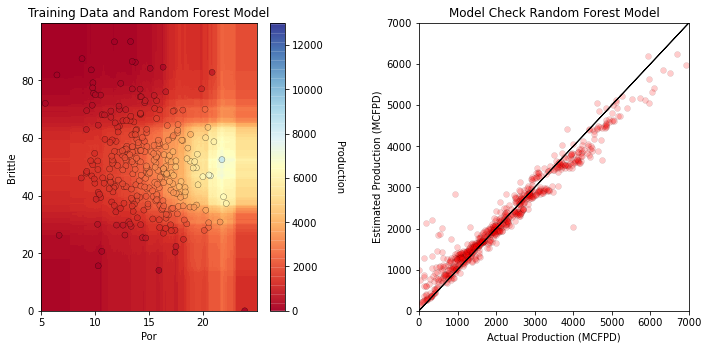

In [24]:
seed = 73093                                                # set the random forest hyperparameters
max_depth = 7
num_tree = 300
max_features = 1

my_first_forest = RandomForestRegressor(max_depth=max_depth, random_state=seed,n_estimators=num_tree, max_features=max_features)

my_first_forest.fit(X = predictors, y = response)           # train the model with training data 

plt.subplot(121)                                            # predict with the model over the predictor feature space and visualize
visualize_model(my_first_forest,my_data_subset["Por"],pormin,pormax,my_data_subset["Brittle"],brittlemin,brittlemax,my_data_subset["Production"],prodmin,prodmax,'Training Data and Random Forest Model')

plt.subplot(122)                                            # perform cross validation with withheld testing data
check_model(my_first_forest,my_data_test_subset["Por"],my_data_test_subset["Brittle"],my_data_test_subset["Production"],'Model Check Random Forest Model')

plt.subplots_adjust(left=0.0, bottom=0.0, right=1.5, top=1.0, wspace=0.4, hspace=0.2)

The power of tree diversity!  We just built our best model so far.  

* the conditional bias has decreased (our plot has a slope closer to 1:1)

* we have the highest variance explained and linear correlation coefficient in testing with the withheld testing data

Let's run some tests to make sure we understand random forest regression model.

First let's confirm that only one feature (at random) is considered for each split

* limit ourselves to maximum depth = 1, only one split

* limit ourselves to a single tree in each forest!

This way we can see the divesity in the first splits over multiple models.

Complete of 6:  1,  2,  3,  4,  5,  6,  

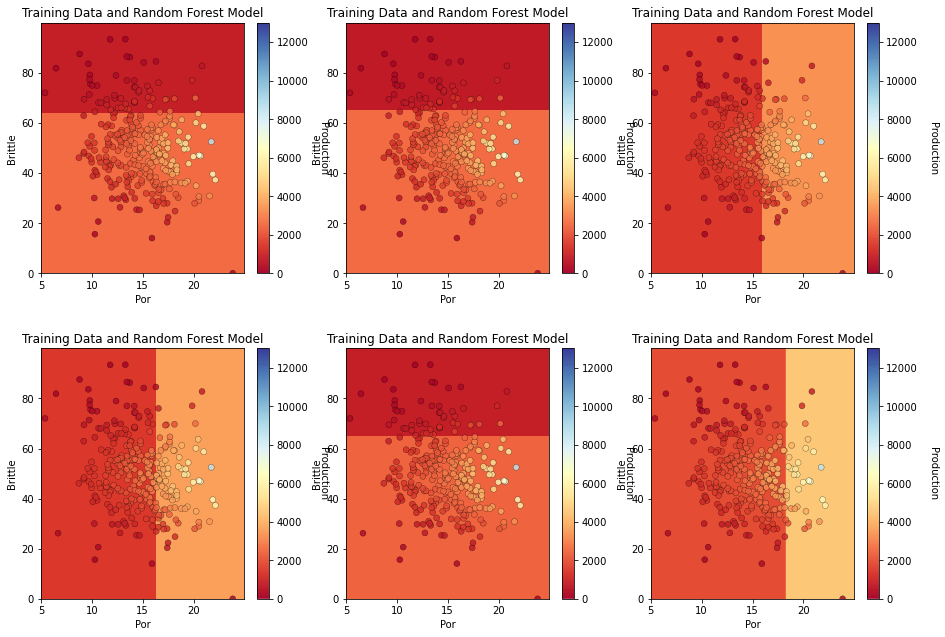

In [25]:
import warnings
warnings.filterwarnings('ignore')                           # ignore warnings
                                  
max_depth = 1                                               # set the random forest hyperparameters
num_tree = 1
max_features = 1
simple_forest = []

seeds = [73103,73104,73105,73106,73107,73108]               # set the random number seeds

index = 1
print('Complete of ' + str(len(seeds)) + ': ', end =" ")
for seed in seeds:                                          # loop over random number seeds
    simple_forest.append(RandomForestRegressor(max_depth=max_depth, random_state=seed,n_estimators=num_tree, max_features=max_features))
    simple_forest[index-1].fit(X = predictors, y = response)
    plt.subplot(2,3,index)                               # predict with the model over the predictor feature space and visualize
    visualize_model(simple_forest[index-1],my_data_subset["Por"],pormin,pormax,my_data_subset["Brittle"],brittlemin,brittlemax,my_data_subset["Production"],prodmin,prodmax,'Training Data and Random Forest Model')
    print(str(index)+ ', ', end =" ")
    index = index + 1
    
plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=2.0, wspace=0.2, hspace=0.3)

Notice that the first splits are 50/50 porosity and brittleness.  

* aside, for all decision trees that I have fit to this dataset, porosity is always the feature selected for the first 2-3 levels of the tree.  

* the random forest has resulted in model diversity by limiting the predictor features under consideration for the first split!

Just incase you don't trust this, let's rerun the above code with both predictors allowed for all splits.

Complete of 6:  1,  2,  3,  4,  5,  6,  

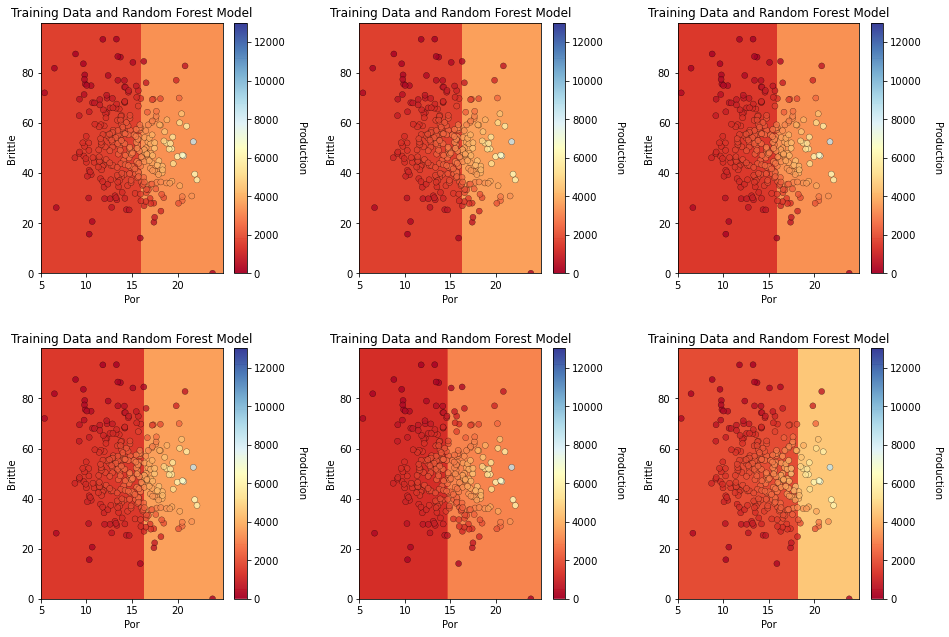

In [26]:
import warnings
warnings.filterwarnings('ignore')
                                  
max_depth = 1                                               # set the random forest hyperparameters
num_tree = 1
max_features = 2
simple_forest = []

seeds = [73103,73104,73105,73106,73107,73108]               # random number seeds 

index = 1
print('Complete of ' + str(len(seeds)) + ': ', end =" ")
for seed in seeds:                                          # loop over random number seeds
    simple_forest.append(RandomForestRegressor(max_depth=max_depth, random_state=seed,n_estimators=num_tree, max_features=max_features))
    simple_forest[index-1].fit(X = predictors, y = response)
    plt.subplot(2,3,index)                               # predict with the model over the predictor feature space and visualize
    visualize_model(simple_forest[index-1],my_data_subset["Por"],pormin,pormax,my_data_subset["Brittle"],brittlemin,brittlemax,my_data_subset["Production"],prodmin,prodmax,'Training Data and Random Forest Model')
    print(str(index)+ ', ', end =" ")
    index = index + 1
    
plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=2.0, wspace=0.4, hspace=0.3)

Now we have a set of first splits that vary (due to the bootstrap of the training data), but are all over porosity.

#### Model Performance by Out-of-Bag and Feature Importance

Since we are now building a more robust model with a large ensemble of trees, let's get more serious about model checking.

* we will look at out-of-bag mean square error

* we will look at feature importance

Let's start with a pretty big forest, this may take a while to run!

Mean Squared Error on Training =  184926.74 , Variance Explained = 0.92 Cor = 0.96


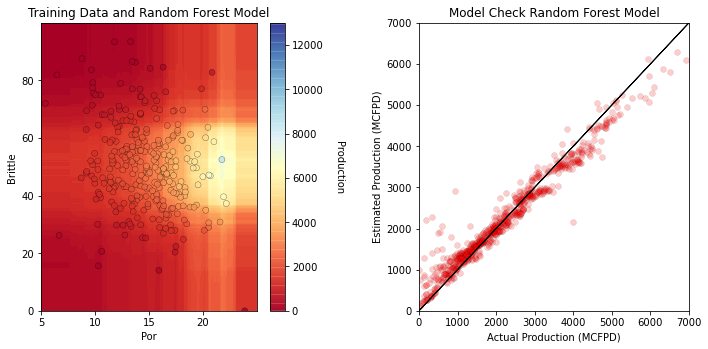

In [27]:
seed = 73093                                                # set the random forest hyperparameters
max_depth = 7
num_tree = 500
max_features = 1

big_forest = RandomForestRegressor(max_depth=max_depth, random_state=seed,n_estimators=num_tree, max_features=max_features, oob_score = True, n_jobs = 4)

big_forest.fit(X = predictors, y = response)

plt.subplot(121)                                            # predict with the model over the predictor feature space and visualize
visualize_model(big_forest,my_data_subset["Por"],pormin,pormax,my_data_subset["Brittle"],brittlemin,brittlemax,my_data_subset["Production"],prodmin,prodmax,'Training Data and Random Forest Model')

plt.subplot(122)                                            # perform cross validation with withheld testing data
check_model(big_forest,my_data_test_subset["Por"],my_data_test_subset["Brittle"],my_data_test_subset["Production"],'Model Check Random Forest Model')

plt.subplots_adjust(left=0.0, bottom=0.0, right=1.5, top=1.0, wspace=0.4, hspace=0.2)

To get the feature importance we just have to access the model member 'feature_importance_'.

* we had to set feature_importance to true in the model instantiation for this to be avaible

* this measure is standardized to sum to 1.0

* same order as the predictor features in the 2D array, porosity and then brittleness

* feature importance is the proportion of total MSE reduction through splits for each feature

* we can access the importance for each feature for each tree in the forest or the global average for each over the entire forest

We get the global average of feature importance with this member of the random forest regressor model.

In [28]:
big_forest.feature_importances_

array([0.59873557, 0.40126443])

We can plot this with a bar chart and include the error bar using the feature importance from every tree in the forest.

1. feature 0 (0.598736)
2. feature 1 (0.401264)


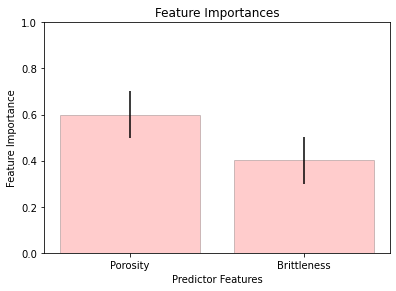

In [29]:
importances = big_forest.feature_importances_               # expected (global) importance over the forest fore each predictor feature
std = np.std([tree.feature_importances_ for tree in big_forest.estimators_],axis=0) # retrieve importance by tree
indices = np.argsort(importances)[::-1]

features = ['Porosity','Brittleness']                       # names or predictor features

for f in range(len(features)):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

plt.subplot(111)
plt.title("Feature Importances")
plt.bar(features, importances[indices],color="red", alpha = 0.2, edgecolor = 'black', yerr=std[indices], align="center")
#plt.xticks(range(X.shape[1]), indices)
plt.ylim(0,1), plt.xlabel('Predictor Features'); plt.ylabel('Feature Importance')
plt.subplots_adjust(left=0.0, bottom=0.0, right=0.8, top=0.8, wspace=0.2, hspace=0.2)
plt.show()

Let's try some hyperparameter training with the out-of-bag mean square error measure from our forest.

Let's start with the number of trees in our forest.

Complete of 100:  1,  2,  3,  4,  5,  6,  7,  8,  9,  10,  11,  12,  13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,  92,  93,  94,  95,  96,  97,  98,  99,  100,  

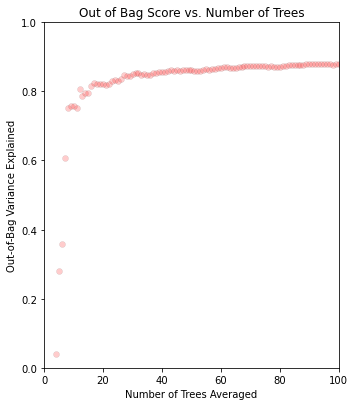

In [30]:
import warnings
warnings.filterwarnings('ignore')
                                  
max_depth = 5                                              # set the random forest hyperparameters
num_trees = np.linspace(1,100,100)
max_features = 1
fit_forests = []
oob_MSE = []

index = 1
print('Complete of ' + str(len(num_trees)) + ': ', end =" ")
for num_tree in num_trees:                                 # loop over number of trees in our random forest
    fit_forests.append(RandomForestRegressor(oob_score = True,max_depth=max_depth, random_state=seed,n_estimators=int(num_tree), max_features=max_features))
    fit_forests[index-1].fit(X = predictors, y = response)
    oob_MSE.append(fit_forests[index-1].oob_score_)
    print(str(index)+ ', ', end =" ")
    index = index + 1
    
plt.subplot(121)
plt.scatter(num_trees,oob_MSE,s=None, c='red', marker=None, cmap=None, norm=None, vmin=None, vmax=None, alpha=0.2, linewidths=0.3, verts=None, edgecolors="black")
plt.title('Out of Bag Score vs. Number of Trees'); plt.xlabel('Number of Trees Averaged'); plt.ylabel('Out-of-Bag Variance Explained')
plt.xlim(0,100); plt.ylim(0,1.0)

plt.subplots_adjust(left=0.0, bottom=0.0, right=1.5, top=1.2, wspace=0.2, hspace=0.2)
plt.show()

Now let's try the depth of the trees, given enough trees (we'll use 60 trees) as determined above.

Complete of 40:  1,  2,  3,  4,  5,  6,  7,  8,  9,  10,  11,  12,  13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,  40,  

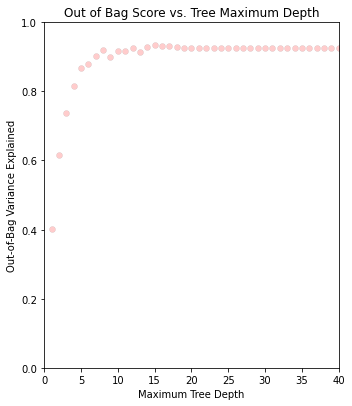

In [31]:
import warnings
warnings.filterwarnings('ignore')
                                  
max_depths = np.linspace(1,40,40)                          # set the tree maximum tree depths to consider

num_tree = 60                                              # set the random forest hyperparameters
max_features = 1
fit_forests = []
oob_MSE = []

index = 1
print('Complete of ' + str(len(max_depths)) + ': ', end =" ")
for max_depth in max_depths:                               # loop over tree depths
    fit_forests.append(RandomForestRegressor(oob_score = True,max_depth=int(max_depth), random_state=seed,n_estimators=num_tree, max_features=max_features))
    fit_forests[index-1].fit(X = predictors, y = response)
    oob_MSE.append(fit_forests[index-1].oob_score_)
    print(str(index)+ ', ', end =" ")
    index = index + 1
    
plt.subplot(121)                                           # plot the variance explained vs. tree depth
plt.scatter(max_depths,oob_MSE,s=None, c='red', marker=None, cmap=None, norm=None, vmin=None, vmax=None, alpha=0.2, linewidths=0.3, verts=None, edgecolors="black")
plt.title('Out of Bag Score vs. Tree Maximum Depth'); plt.xlabel('Maximum Tree Depth'); plt.ylabel('Out-of-Bag Variance Explained')
plt.xlim(0,40); plt.ylim(0,1.0)

plt.subplots_adjust(left=0.0, bottom=0.0, right=1.5, top=1.2, wspace=0.2, hspace=0.2)
plt.show()

It looks like we need a maximum tree depth of atleast 10 splits for best performance of our model with respect to out-of-bag samples variance explained.

* note that our model is robust and resistant to overfit, the out-of-bag performance evaluation is close to monotonically increasing.

#### Comments

This was an interactive workflow covering the basics of tree bagging and ensemble tree averaging. 

The Texas Center for Geostatistics has many other demonstrations on the basics of working with DataFrames, ndarrays, univariate statistics, plotting data, declustering, data transformations, trend modeling and many other workflows available [here](https://github.com/GeostatsGuy/PythonNumericalDemos), along with a package for geostatistics in Python called [GeostatsPy](https://github.com/GeostatsGuy/GeostatsPy). 
  
We hope this was helpful,

*Harry Khuc* and *Michael*

***

#### More on Michael Pyrcz and the Texas Center for Data Analytics and Geostatistics:

### Michael Pyrcz, Associate Professor, University of Texas at Austin 
*Novel Data Analytics, Geostatistics and Machine Learning Subsurface Solutions*

With over 17 years of experience in subsurface consulting, research and development, Michael has returned to academia driven by his passion for teaching and enthusiasm for enhancing engineers' and geoscientists' impact in subsurface resource development. 

For more about Michael check out these links:

#### [Twitter](https://twitter.com/geostatsguy) | [GitHub](https://github.com/GeostatsGuy) | [Website](http://michaelpyrcz.com) | [GoogleScholar](https://scholar.google.com/citations?user=QVZ20eQAAAAJ&hl=en&oi=ao) | [Book](https://www.amazon.com/Geostatistical-Reservoir-Modeling-Michael-Pyrcz/dp/0199731446) | [YouTube](https://www.youtube.com/channel/UCLqEr-xV-ceHdXXXrTId5ig)  | [LinkedIn](https://www.linkedin.com/in/michael-pyrcz-61a648a1)

#### Want to Work Together?

I hope this content is helpful to those that want to learn more about subsurface modeling, data analytics and machine learning. Students and working professionals are welcome to participate.

* Want to invite me to visit your company for training, mentoring, project review, workflow design and / or consulting? I'd be happy to drop by and work with you! 

* Interested in partnering, supporting my graduate student research or my Subsurface Data Analytics and Machine Learning consortium (co-PIs including Profs. Foster, Torres-Verdin and van Oort)? My research combines data analytics, stochastic modeling and machine learning theory with practice to develop novel methods and workflows to add value. We are solving challenging subsurface problems!

* I can be reached at mpyrcz@austin.utexas.edu.

I'm always happy to discuss,

*Michael*

Michael Pyrcz, Ph.D., P.Eng. Associate Professor The Hildebrand Department of Petroleum and Geosystems Engineering, Bureau of Economic Geology, The Jackson School of Geosciences, The University of Texas at Austin

#### More Resources Available at: [Twitter](https://twitter.com/geostatsguy) | [GitHub](https://github.com/GeostatsGuy) | [Website](http://michaelpyrcz.com) | [GoogleScholar](https://scholar.google.com/citations?user=QVZ20eQAAAAJ&hl=en&oi=ao) | [Book](https://www.amazon.com/Geostatistical-Reservoir-Modeling-Michael-Pyrcz/dp/0199731446) | [YouTube](https://www.youtube.com/channel/UCLqEr-xV-ceHdXXXrTId5ig)  | [LinkedIn](https://www.linkedin.com/in/michael-pyrcz-61a648a1)
